# SINIFLANDIRMA PROBLEMLERİ

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,log_loss
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from warnings import filterwarnings
filterwarnings("ignore")

# Logistic Regresyon
* Amac: Sınıflandırma problemi icin bagımlı ve bagımsız degiskenler arasındaki iliskiyi tanımlayan dogrusal bir model kurmaktır

In [6]:
# Burada bagımlı degiskenimiz kategoriktir.Bir sınıflandırıcı secilir.
# Yanıt degiskeni iki durumlu olan durumlarda dogrusal degisken kullanabiilir.ama iki den fazla sınıf oldugunda kullanılamaz.
#Logistic regresyonda degerlerin 0 ile 1 arasında olması garanti altına alınmıs olur.
# İlgilendigimiz sınıfın 1 olması olasılıgı ile ilgili bir olasılık degerleri hesaplanır.


In [7]:
# Dogrusal regresyonda bir modelleme calısması icin kullanılabilir.
# Fakat logistic regresyon kullanıldıgında yapılacak olan sınıf tahmininin 
# 0 ile 1 arasında olmasını garanti eder ve belirlenecek olan bir esik degerine göre
# bu durumun bir degerlendirme sansı olur.

* Logistic Regresyon Özellikleri
    - Bagımlı degisken kategoriktir
    - Adını bagımlı degiskene uygulanan logit dönüsümünden alır
    - Dogrusal Regresyonda aranan varsayımlar burada aranmadıgı icin dha esnek kullanabilirligi vardır.
    - Bagımlı degiskenin 1 olarak tanımlanan degerinin gerceklesme olasılıgı hesaplanır. Dolayısıyla bagımlı degiskenin alacagı degerler ile ilgilenilmez.
    - Logistic fonksiyonu sayesinde üretilen degerler 0-1 arasında olur.

In [8]:
# 1 yada 0 olması ile değil 1 veya 0 olmasının olasılıgı ile ilgilenilir.

# Logistic Regresyon - MODEL

In [66]:
diabets=pd.read_csv("diabets.csv")
df=diabets.copy()
df=df.dropna()# eskik gözlemleri cıkarttık
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [67]:
# bir hasta geldignde onun seker hastası olup olmadıgını 
#tahmin eden bir makine öğrenmesi modeli geliştirmek

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [69]:
# ilgilendigimiz sınıf 1 sınıfı olacak.Diabets hastası degil yada hasta 

In [70]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

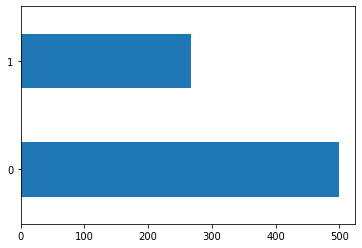

In [71]:
df["Outcome"].value_counts().plot.barh()

In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [73]:
# Outcome degiskenine arka tarafta etkisi olan degiskenler nelerdir.
# Makine öğrenmesi algoritması arkada bu degiskenleri bulmaya calısır.


In [74]:
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)

In [75]:
# statsmodel ile model kurma 

loj=sm.Logit(y,X)
loj_model=loj.fit()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


In [76]:
loj_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Mon, 04 May 2020   Pseudo R-squ.:                 0.05922
Time:                        16:09:55   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [77]:
# scikitlearn ile model kurma

from sklearn.linear_model import LogisticRegression
loj=LogisticRegression(solver="liblinear")
loj_model=loj.fit(X,y)

In [78]:
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
loj_model.intercept_

array([-5.88581574])

In [80]:
loj_model.coef_

array([[ 1.17109287e-01,  2.83637114e-02, -1.69030150e-02,
         7.35724571e-04, -6.42784045e-04,  5.96466920e-02,
         6.85700638e-01,  7.19299389e-03]])

# Logistic Regresyon - TAHMİN----MODEL TUNİNG

In [81]:
y_pred=loj_model.predict(X)# BAGIMSIZ DEGİSKENLERİ TAHMİN ET 
confusion_matrix(y,y_pred)

array([[448,  52],
       [120, 148]], dtype=int64)

In [82]:
accuracy_score(y,y_pred)# dogru sınıflandırma oranımız

0.7760416666666666

In [83]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.78       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.78      0.77       768



In [84]:
loj_model.predict(X)[0:5]# tahmin edilen degerler

array([1, 0, 1, 0, 1], dtype=int64)

In [85]:
loj_model.predict_proba(X)[0:10]# olasılık degerleri
# 1 e ait olasılıklar sag taraftadır.

array([[0.35043779, 0.64956221],
       [0.91696356, 0.08303644],
       [0.22433864, 0.77566136],
       [0.92141996, 0.07858004],
       [0.16538713, 0.83461287],
       [0.79904414, 0.20095586],
       [0.88018381, 0.11981619],
       [0.27825923, 0.72174077],
       [0.32175629, 0.67824371],
       [0.9226324 , 0.0773676 ]])

In [29]:
y[0:10]# gercek degerler

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [30]:
y_probs=loj_model.predict_proba(X)
y_probs=y_probs[:,1]

In [31]:
y_probs[0:10]

array([0.64956221, 0.08303644, 0.77566136, 0.07858004, 0.83461287,
       0.20095586, 0.11981619, 0.72174077, 0.67824371, 0.0773676 ])

In [32]:
# belli bir esik degere göre 1 ve 0 olarak işaretlemek istersek;
y_pred=[1 if i >0.5 else 0 for i in y_probs]# 1 yap 0.5 ten büyükse degilse 0 yap
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [33]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [120, 148]], dtype=int64)

In [34]:
accuracy_score(y,y_pred)# dogru yaptıgımız isler/ tüm isler

0.7760416666666666

In [35]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.78       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.78      0.77       768



In [36]:
# roc eğrisi - auc score(egri altında kalan alan )
# baska bir basarıyı degerlendirme 

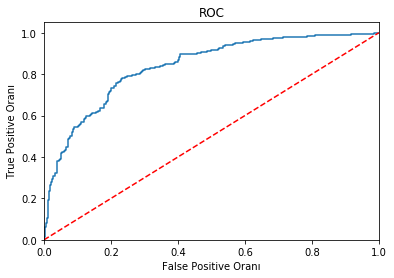

In [37]:
logit_roc_auc=roc_auc_score(y,loj_model.predict(X))

fpr,tpr,threshold=roc_curve(y,loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='AUC( area =%0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [38]:
# mümkün oldugu kadar kırmızı çizgiden uzaklasmak gerekiyor.

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,
                                              random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression
loj=LogisticRegression(solver="liblinear")
loj_model=loj.fit(X_train,y_train)

In [41]:
y_pred=loj_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7447916666666666

In [42]:
cross_val_score(loj_model,X_test,y_test,cv=10).mean()# en dogru sonuca ulasırız.

0.7273684210526316

# Naive Bayes 
* Olasılık temelli bir modelleme tekniğidir. Amac belirli bir örnegin her bir sınıfa ait olma olasılıgının kosullu olasılık temelli hesaplanmasıdır.

In [43]:
# cok kategorili sınıflarda iyi calısıldıgı söylenir.kategorik degisken sayısı sürekli degisken sayısı kadar oldugunda iyi calıtıgı söyleniyor.

# Gaussian Naive Bayes - MODEL

In [97]:
diabets=pd.read_csv("diabets.csv")
df=diabets.copy()
df=df.dropna()# eskik gözlemleri cıkarttık
df.head()
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,
                                              random_state=42)

In [98]:
from sklearn.naive_bayes import GaussianNB

In [99]:
naive_bayes=GaussianNB()
nb_model=naive_bayes.fit(X_train,y_train)

In [100]:
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [48]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [49]:
# eger bagımlı degiskenin sınıflarının dagılımı birbibirinden cok farklıysa bu dengesiz veridir.
# Anormal durum olursa test size ı gözden gecirmek gerekmektedir.

In [50]:
nb_model.predict_proba(X_test)[0:10]# sınıfların olasılık degerleri

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [51]:
y_pred=nb_model.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred)# test hatası 

0.7445887445887446

In [53]:
cross_val_score(nb_model,X_test,y_test,cv=10).mean()# test hatasının dogrulanmıs hali

0.775

In [54]:
# naive bayes ın dıssal parametresi olmadıgı için model tuning yapmadık.

# K -En Yakın Komsu (KNN)
* Tahminler gözlem benzerliğine göre yapılır.

* KNN Basamakları
    - Komsu sayısını belirle(K)
    - Bilinmeyen nokta ile diğer tüm noktalar ilearasındaki uzaklıkları hesapla
    - Uzaklıkları sırala ve belirlenen k sayısna göre en yakın olan k gözlemi sec,
    - Sınıflandırma ise en sık sınıf regresyon ise ortalama degeri tahmi degeri olarak ver

# KNN - MODEL & TAHMİN

In [52]:
diabets=pd.read_csv("diabets.csv")
df=diabets.copy()
df=df.dropna()# eskik gözlemleri cıkarttık
df.head()
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,
                                              random_state=42)

In [53]:
knn=KNeighborsClassifier()

In [54]:
knn_model=knn.fit(X_train,y_train)

In [55]:
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [56]:
y_pred=knn_model.predict(X_test)

In [57]:
accuracy_score(y_test,y_pred)

0.6883116883116883

In [58]:
cross_val_score(knn_model,X_test,y_test,cv=10).mean()# dogrulanmıs test hatası

0.6755434782608696

# KNN - MODEL TUNİNG

In [59]:
knn_params={'n_neighbors':np.arange(1,50)}


In [60]:
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,knn_params,cv=10)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [61]:
print("En iyi skor:"+str(knn_cv.best_score_))
print("En iyi parametreler:"+str(knn_cv.best_params_))

En iyi skor:0.7486033519553073
En iyi parametreler:{'n_neighbors': 11}


In [62]:
knn_tuned=KNeighborsClassifier(n_neighbors=11)
knn_tuned.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [63]:
y_pred=knn_tuned.predict(X_test)

In [67]:
accuracy_score(y_test,y_pred)

0.7316017316017316

In [68]:
knn_tuned.score(X_test,y_test)

0.7316017316017316

# Destek Vektör Makineleri (SVM)

* Amaç: İki sınıf arasındaki ayrımın(marjin) optimum olmasını sağayacak hiper-düzlemi bulmaktır.

* peki optimum hiper düzlem nasıl bulunur?
- iki dogrunun arasında nokta olmayacak sekilde aralarındaki mesafenin 
maksimum  tutulması calısılmasıdır.

* Sınıflar dogrusal olmadıgında kernel trick adı verilen yöntem kullanılır. Radial basis adı verilen fonksiyon ile gercekleşiyor.

# Support Vector Classification- MODEL & TAHMİN

In [101]:
diabets=pd.read_csv("diabets.csv")
df=diabets.copy()
df=df.dropna()# eskik gözlemleri cıkarttık
df.head()
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,
                                              random_state=42)

In [88]:
svc_model=SVC(kernel="linear").fit(X_train,y_train)

In [89]:
svc_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [90]:
y_pred=svc_model.predict(X_test)

In [91]:
accuracy_score(y_test,y_pred)

0.7445887445887446

# SVC - MODEL TUNİNG

In [92]:
svc_params={"C":np.arange(1,10)}# c degerinin 0 olmamsı gerekiyor
# bu nedenle 1 ile 10 arasında yaptık

In [102]:
svc=SVC(kernel="linear")

svc_cv_model=GridSearchCV(svc,svc_params,cv=10,n_jobs=-1,verbose=2)

In [94]:
svc_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 13.4min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
svc_cv_model.best_params_

In [103]:
svc_tuned=SVC(kernel="linear",C=5).fit(X_train,y_train)



In [104]:
y_pred=svc_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7445887445887446

# Dogrusal Olmayan Destek Vektör Makinaları
## RBF SVC
### MODEL & TAHMİN

In [105]:
diabets=pd.read_csv("diabets.csv")
df=diabets.copy()
df=df.dropna()# eskik gözlemleri cıkarttık
df.head()
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,
                                              random_state=42)

In [106]:
svc_model=SVC(kernel="rbf")# ön tanımlı degeri zaten rbf dir
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
dir(svc_model)

In [ ]:
y_pred=svc_model.predict(X_test)
accuracy_score(y_test,y_pred)

# SVC RBF- MODEL TUNİNG 

In [107]:
svc_params={"C":[0.001,0.001,0.1,1,5,10,50,100],
           "gamma":[0.001,0.001,0.1,1,5,10,50,100]}


In [ ]:
svc=SVC(kernel="rbf")

In [ ]:
svc_cv_model=GridSearchCV(svc,svc_params,cv=10,n_jobs=-1,verbose=2)
svc_cv_model.fit(X_train,y_train)

In [ ]:
svc_cv_model.best_params_

In [108]:
svc_tuned=SVC(C=1,gamma=0.001).fit(X_train,y_train)

In [109]:
y_pred=svc_tuned.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

# Yapay Sinir Agaları- TEORİ

* İnsan beyninin bilgi işleme seklini referans alan sınıflandırma ve regresyon problemleri icin kullanılabilen kuvvetli makine öğrenmesi algortimalarından birisidir.

In [ ]:
# epoch : iterasyon sayısı
# her epochda gercek deger ile tahmin edilen deger karşılasştırılıyor.
# bir sonraki epoch için agırlıklar güncelleniyor tekrar iterayon gerceklesiyor ve tekrar tahmin degeri olusturulup gercek deger ile karsılastırılıyor.
#buna öğrenme deniyor. Öğrenme işlemi tamamlandıgında elimizde optimum katsayılar bulunulmus oluyor.

# Yapay Sinir Ağları  MODEL & TAHMİN

In [111]:
diabets=pd.read_csv("diabets.csv")
df=diabets.copy()
df=df.dropna()# eskik gözlemleri cıkarttık
df.head()
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,
                                              random_state=42)

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
scaler=StandardScaler()

In [117]:
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [18]:
X_train_scaled[0:2]

array([[-0.8362943 , -0.80005088, -0.53576428, -0.15714558, -0.18973183,
        -1.06015343, -0.61421636, -0.94861028],
       [ 0.39072767, -0.49054341,  0.12804365,  0.55361931,  2.13020339,
         0.64646721, -0.90973787, -0.43466673]])

In [115]:
from sklearn.neural_network import MLPClassifier

In [118]:
mlpc=MLPClassifier().fit(X_train_scaled,y_train)# multi layer perceptron classifcation

In [119]:
mlpc.coefs_

[array([[ 2.74425357e-02,  1.04908385e-01,  1.07865755e-01,
         -5.81046802e-02, -3.27684489e-01, -1.27325399e-01,
         -1.43676908e-01,  1.26214176e-01,  1.77436274e-02,
          6.19974248e-02,  1.46624728e-01, -3.24824632e-02,
          1.41585561e-01, -5.16204168e-02,  6.53982488e-02,
         -3.68460916e-01, -2.82892501e-01,  5.28363830e-02,
         -5.58852971e-01,  1.49733104e-02,  1.46685432e-01,
         -1.69474708e-01,  5.11400901e-02, -1.42535168e-01,
         -4.04988795e-01, -2.92978451e-01, -1.61396516e-02,
         -1.76373350e-01, -1.74779486e-01,  3.50294229e-01,
          7.90994349e-02, -2.07726335e-01, -3.66731896e-01,
          3.77767321e-01,  1.51044789e-01, -5.81347286e-02,
          2.04361943e-02,  9.04100818e-02, -4.83368116e-02,
          9.94482617e-02, -2.83417025e-01,  6.61032981e-02,
          1.01606268e-01, -5.98420576e-02, -1.49385385e-03,
         -4.51587533e-01, -6.38093023e-02,  7.21991745e-02,
         -3.05027567e-01, -4.54302966e-0

In [25]:
dir(mlpc)# modelle ilgili erismek istediklerimize bakarız

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_backprop',
 '_compute_loss_grad',
 '_estimator_type',
 '_fit',
 '_fit_lbfgs',
 '_fit_stochastic',
 '_forward_pass',
 '_get_param_names',
 '_get_tags',
 '_init_coef',
 '_initialize',
 '_label_binarizer',
 '_loss_grad_lbfgs',
 '_no_improvement_count',
 '_optimizer',
 '_partial_fit',
 '_predict',
 '_random_state',
 '_unpack',
 '_update_no_improvement_count',
 '_validate_hyperparameters',
 '_validate_input',
 'activation',
 'alpha',
 'batch_size',
 'best_loss_',
 'beta_1',
 'beta_2',
 'classes_',
 'coefs_',
 'early_stopping',
 'epsilon',
 'fit',
 'get_p

In [26]:
y_pred=mlpc.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.7316017316017316

# Yapay Sinir Agaları - MODEL TUNİNG

In [27]:
# adam metodu büyük veri setlerinde daha iyi oldugu bilinen bir metoddur.
# veri setimizin küçük oldugu dudrumlarda hangi metodun kullanlacagı bilinmesi gerekir.


In [29]:
?mlpc

Type:        MLPClassifier
String form:
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_ <...> olver='adam', tol=0.0001,
           validation_fraction=0.1, verbose=False, warm_start=False)
File:        c:\users\aayse\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default 'relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

In [30]:
mlpc

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [120]:
mlpc_params={"alpha":[0.1,0.01,0.02,0.005,0.0001,0.00001],# ceza parametresi
            "hidden_layer_sizes":[(10,10,10),
                                 (100,100,100),
                                 (100,100),(3,5),(5,3)],
            "solver":["lbfgs","adam","sgd"],
            "activation":["relu","logistic"]}#activation function

In [33]:
mlpc=MLPClassifier()
mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,
                          cv=10,n_jobs=-1,
                          verbose=2)
mlpc_cv_model.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 10.9min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
               

In [34]:
mlpc_cv_model.best_params_

{'activation': 'relu',
 'alpha': 0.02,
 'hidden_layer_sizes': (100, 100),
 'solver': 'sgd'}

In [148]:
mlpc_tuned=MLPClassifier(alpha=0.02,
                        hidden_layer_sizes=(100,100),
                        solver="sgd",
                        activation="relu")

In [149]:
mlpc_tuned.fit(X_train_scaled,y_train)

MLPClassifier(activation='relu', alpha=0.02, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [150]:
y_pred=mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.7619047619047619

# Classification and Regression (CART) - TEORİ

* Amac: Veri seti içeirisndeki karmasık yapıları basit karar yapılarına dönüştürmektir.Heterojen veri setleri belirlenmiş bir hedef degiskene göre homojen alt gruplara ayrılır.

# Classification and Regression MODEL- TAHMİN

In [122]:
diabets=pd.read_csv("diabets.csv")
df=diabets.copy()
df=df.dropna()# eskik gözlemleri cıkarttık
df.head()
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
#X=df["Pregnancies"]
#X=pd.DataFrame(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,
                                              random_state=42)

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
cart= DecisionTreeClassifier()
cart_model=cart.fit(X_train,y_train)

In [85]:
cart_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [86]:
#!pip install skompiler

In [87]:
from skompiler import skompile

In [88]:
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((1 if x[1] <= 123.0 else 0) if x[5] <= 
    37.39999961853027 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (
    0 if x[6] <= 0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else
    0) if x[0] <= 4.5 else 1 if x[2] <= 67.0 else 0) if x[5] <= 
    49.10000038146973 else 1) if x[1] <= 127.5 else 1 if x[2] <= 56.0 else 
    (0 if x[7] <= 27.5 else 1 if x[1] <= 138.0 else 0) if x[5] <= 
    30.300000190734863 else 1 if x[5] <= 32.000000953674316 else ((0 if x[5
    ] <= 33.75 else 1) if x[0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else
    0) if x[2] <= 85.0 else 1) if x[7] <= 28.5 else (1 if x[7] <= 29.5 else
    (0 if x[1] <= 133.0 else (1 if x[2] <= 74.0 else 0) if x[0] <= 4.5 else
    0) if x[2] <= 94.0 else 1 if x[5] <= 12.0 else 0) if x[5] <= 
    26.949999809265137 else (1 if x[1] <= 28.5 el

In [61]:
x=[3]# kullanıcı 3 hamilelik gecirdiginde 

In [62]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

0

In [63]:
# sınıf tahmin olarak ;x e 3 verdigimzde 0 degeri cıktı.
# yani 3 hamilelik geçirmesi ile seker hatsaı olması sınıf durumu 0 olarak cıktı.

In [64]:
x=[9]#v 9 hamilelik gecirmis olsun
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [ ]:
# sınıf sonucu 1 olarak cktı.

In [90]:
y_pred=cart_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7056277056277056

# Classification and Regression  - MODEL TUNİNG

In [91]:
cart_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [92]:
?cart_model
# min_samples_leaf:en son nodelarda barındırılacak olan eleman sayısını ifade eder.
# min_samples_split:olusturulan bir node 'un iiçindeki minimum örnek sayısnı ifade ediyor.



Type:        DecisionTreeClassifier
String form:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
           <...> ight_fraction_leaf=0.0, presort=False,
           random_state=None, splitter='best')
File:        c:\users\aayse\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\tree\tree.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : string, optional (default="gini")
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : string, optional (default="best")
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int or None, optional (default=None)
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until

In [125]:
cart_params={"max_depth":list(range(1,10)),
            "min_samples_split":list(range(2,50))}

In [95]:
cart=tree.DecisionTreeClassifier()
cart_cv=GridSearchCV(cart,cart_params,cv=10,n_jobs=-1,verbose=2)
cart_cv_model=cart_cv.fit(X_train,y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 1682 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   18.5s finished


In [96]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 19}

In [126]:
cart=tree.DecisionTreeClassifier(max_depth=5,
                                min_samples_split=19)
cart_tuned=cart.fit(X_train,y_train)

In [127]:
y_pred=cart_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7532467532467533

# Random Forests Sınıflandırma

* Temeli birden cok karar agacının ürettiği tahminleri bir araya getirilerek degerlendirilmesine dayanır.

# Random Forest - MODEL & TAHMİN

In [128]:
diabets=pd.read_csv("diabets.csv")
df=diabets.copy()
df=df.dropna()# eskik gözlemleri cıkarttık
df.head()
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,
                                              random_state=42)

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
rf_model=RandomForestClassifier().fit(X_train,y_train)

In [130]:
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:
y_pred=rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7402597402597403

# Random Forest - MODEL TUNİNG 

In [106]:
?rf_model
# n_estimators: kullanılacak olan agac sayısı(bilmsel çalışmalar da bu degerin 500 yada 1000 olması gerekitigi söyleniliyor)
# bu degerler her calısmada aynı sekilde olacak  demek degildir.

Type:        RandomForestClassifier
String form:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
           <...> obs=None, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Length:      10
File:        c:\users\aayse\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is always the same as the original
input sample size but the samples are drawn with replacement if
`bootstrap=True` (default).

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : integer, optional (default=10)
    The number of trees in the forest.

    .. versionchanged:: 0.20
       The default value of ``n_estimators`` will change from 10 in
      

In [131]:
rf_params={"max_depth":[2,3,5,8,10],
          "max_features":[2,5,8],
          "n_estimators":[10,500,1000],
          "min_samples_split":[2,5,10]}# göz öünde bulunacak olan degsken sayısı

In [112]:
rf_model=RandomForestClassifier()
rf_cv_model=GridSearchCV(rf_model,
                       rf_params,
                       cv=10,
                       n_jobs=-1,verbose=2)

In [113]:
rf_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed: 10.8min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [114]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 8,
 'min_samples_split': 2,
 'n_estimators': 500}

In [152]:
rf_tuned=RandomForestClassifier(max_depth= 8,
 max_features=8,
 min_samples_split= 2,
 n_estimators= 500)

In [153]:
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [154]:
y_pred=rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7575757575757576

Text(0.5, 0, 'Degiskenlerin Önem Düzeyleri')

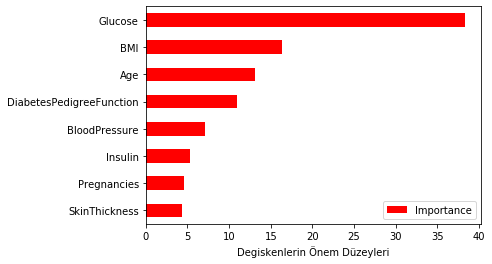

In [125]:
# degisken önem düzeyi bulma
Importance=pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},
                       index=X_train.columns)
Importance.sort_values(by="Importance",
                       axis=0,
                       ascending=True).plot(kind="barh",
                                            color="r")

plt.xlabel("Degiskenlerin Önem Düzeyleri")

# Gradient Boosting Machines 
* AdaBoost'un sınıflandırma ve regresyon problemlerine kolayca uyarlanabilen genelleştirilmiş versiyonudur.
* Artıklar üzerine tek bir tahminsel model formunda olan modeller serisi kurulur.


* Boosting Yöntemlerine Giriş
    - Zayıf öğrencileri bir araya getirip güçlü bir öğrenci ortaya çıkarmak fikrine dayanır.

* Adaptive Boosting (AdaBoost)
    - Zayıf sınıflandırıcıların bir araya gelerek güçlü bir sınıflandırıcı olusturması fikrini hayata geçiren algoritmadır.

In [1]:
# GBM bir framework dür.

* Gradient boosting machines tek bir tahminsel model formunda olan modeller serisi oluşturulur
* Seri içeirisindeki bir model serideki bir önceki modelin tahmin artıklarının/hatalarının (residuals) üzerine kurularak (fit) edilir.
* GBM diferansiyellenebilen herhangi bir kayıp fonksiyonu optimize edebilen Gradient descent algoritmasını kullanmakta 
* GB bir çok temel öğrenici tipi(base learner type) kullanılabilir.(trees , linear terms,splines,...)
* Cost fonksiyonları ve lin fonksiyonları modifiye edilebilirdir.
* Boosting + Gradient Descent

In [2]:
# Bagging birbirinden bagımsız agaclar olusturur.
# Random Forest temelini bunun üzerine oturtmustur.# Burada modeller birbirinden 7
# bagımsızdır.

# Boosting tek bir tahminsel model ile olusuturlan modeller serisi
# olusturuluyor.Ve bu modeller birbirine bagımlıdır.

# Gradient Boosting Machines - MODEL & TAHMİN

In [133]:
diabets=pd.read_csv("diabets.csv")
df=diabets.copy()
df=df.dropna()# eskik gözlemleri cıkarttık
df.head()
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,
                                              random_state=42)

In [134]:
from sklearn.ensemble import GradientBoostingClassifier

In [135]:
gbm_model=GradientBoostingClassifier().fit(X_train,y_train)

In [136]:
y_pred=gbm_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7445887445887446

# Gradient Boosting Machines - MODEL TUNİNG

In [9]:
gbm_model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [10]:
?gbm_model

Type:        GradientBoostingClassifier
String form:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
           learni <...>                  validation_fraction=0.1, verbose=0,
           warm_start=False)
Length:      100
File:        c:\users\aayse\appdata\local\continuum\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py
Docstring:  
Gradient Boosting for classification.

GB builds an additive model in a
forward stage-wise fashion; it allows for the optimization of
arbitrary differentiable loss functions. In each stage ``n_classes_``
regression trees are fit on the negative gradient of the
binomial or multinomial deviance loss function. Binary classification
is a special case where only a single regression tree is induced.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'deviance', 'exponential'}, optional (default='deviance')
    loss function to be optimized. 'deviance' refers to
    deviance (= logistic regre

In [11]:
# min_samples_leaf:leaf node a bırakılacak olan örnek sayısı

In [140]:
gbm_params={"learning_rate":[0.001,0.01,0.1,0.05],
           "n_estimators":[100,500,1000],
           "max_depth":[3,5,10],
           "min_samples_split":[2,5,10]}

In [141]:
gbm=GradientBoostingClassifier()

In [142]:
gbm_cv=GridSearchCV(gbm,gbm_params,cv=10,n_jobs=-1,verbose=2)

In [143]:
gbm_cv.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 11.7min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...None,
                                                  presort='auto

In [144]:
gbm_cv.best_params_


{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_split': 5,
 'n_estimators': 500}

In [145]:
gbm=GradientBoostingClassifier(learning_rate=0.01,
                                    max_depth=3,
                                    min_samples_split=5,
                                    n_estimators=500)

In [146]:
gbm_tuned=gbm.fit(X_train,y_train)
y_pred=gbm_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7489177489177489

# eXtreme Gradient Boosting(XGBoost)
* XGBoost , GBM'in hız ve tahmin performansını artırmak üzere optimize edilmis ; ölçeklenebilir ve farklı platformlara entegre edilebilir halidir.(Tianqi Chen 2014)

* XGBoost 
    - R,Python,Hadoop,Scala,Julia ile kullanılabilir
    - Ölçeklenebilirdir.
    - Hızlıdır
    - Tahmin basarısı yüksektir.
    - Bir çok kaggle yarısmaında basarısını kanıtlamıstır.

In [2]:
# iteratif işlemleri inmemory olarak kullandıgımızda performansının artıgı görülecektir


# XGBoost - MODEL & TAHMİN

In [3]:
diabets=pd.read_csv("diabets.csv")
df=diabets.copy()
df=df.dropna()# eskik gözlemleri cıkarttık
df.head()
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,
                                              random_state=42)

In [4]:
#!pip install xgboost
from xgboost import XGBClassifier

In [5]:
xgb_model=XGBClassifier().fit(X_train,y_train)

In [6]:
# modelin test hatası 
y_pred=xgb_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7359307359307359

# XGBoost - MODEL TUNİNG

In [7]:
xgb_model

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [8]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
           colsample_bynode=1 <...> weight=1, subsample=1, tree_method=None,
           validate_parameters=False, verbosity=None)
File:        c:\users\aayse\appdata\local\continuum\anaconda3\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.


Parameters
----------

    max_depth : int
        Maximum tree depth for base learners.
    learning_rate : float
        Boosting learning rate (xgb's "eta")
    verbosity : int
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : string or callable
        Specify the learning task and the corresponding learning objective or
        a custom objective function to be used (see note below).
    booster: string
        Specify which booster to use: gbtree, gblinear or dart.
    tree_method: string
        Specify which tree method to use.  

In [15]:
xgb_params={"n_estimators":[100,500,1000,2000],
           "subsample":[0.6,0.8,1.0],
           "max_depth":[3,4,5,6],
           "learning_rate":[0.1,0.01,0.02,0.05],
           "min_samples_split":[2,5,10]}

In [17]:
xgb=XGBClassifier()
xgb_cv_model=GridSearchCV(xgb,xgb_params,cv=10,n_jobs=-1,verbose=2)

In [18]:
xgb_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 28.3min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constra...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid='warn', n_jobs=-1,
             param_

In [19]:
xgb_cv_model.best_params_


{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 1.0}

In [20]:
xgb=XGBClassifier(n_estimators=100,
                       subsample=1.0,
                       max_depth=3,
                       learning_rate=0.01,
                       min_samples_split=2)

In [21]:
xgb_tuned=xgb.fit(X_train,y_train)

In [22]:
y_pred=xgb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7489177489177489

# Light GBM
* Light GBM, XGBoost'un eğitim süresi performansını arttırmaya yönelik geliştirilen bir diğer GBM türüdür.(Microsoft 2017)



* Light GBM
    - Daha performanslı
    - Level-wise büyüme stratejisi yerine Leaf- wise büyüme stratejisi
    - Breadth-first search(BFS) yerine depth-first search (DFS)
    
* Not: Veri setindeki gözlem ve degisken sayısı çok miktarda oldugunda, 

* XGBoost genis kapsamlı ilk arama yapıyor.(BFS)
* LightGBM ise derinlemesine ilk arama yapıyor(DFS)


* Light GBM XGBoost a göre daha performanslıdır

# LightGBM - MODEL & TAHMİN

In [23]:
diabets=pd.read_csv("diabets.csv")
df=diabets.copy()
df=df.dropna()# eskik gözlemleri cıkarttık
df.head()
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,
                                              random_state=42)

In [24]:
#!conda install -c conda-forge lightgbm
from lightgbm import LGBMClassifier

In [25]:
lgbm_model=LGBMClassifier().fit(X_train,y_train)

In [27]:
y_pred=lgbm_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7272727272727273

# LİGHT GBM - MODEL TUNİNG

In [28]:
lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [29]:
?lgbm_model

Type:           LGBMClassifier
String form:   
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
           impo <...> ambda=0.0, silent=True,
           subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
File:           c:\users\aayse\appdata\local\continuum\anaconda3\lib\site-packages\lightgbm\sklearn.py
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : string, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``

In [30]:
lgbm_params={"n_estimators":[100,500,1000,2000],
           "subsample":[0.6,0.8,1.0],
           "max_depth":[3,4,5,6],
           "learning_rate":[0.1,0.01,0.02,0.05],
           "min_child_samples":[5,10,20]}

In [31]:

lgbm=LGBMClassifier()
lgbm_cv_model=GridSearchCV(lgbm,
                           lgbm_params,
                           cv=10,
                           n_jobs=-1,
                           verbose=2)

In [32]:
lgbm_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 18.9min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                  

In [33]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_samples': 20,
 'n_estimators': 500,
 'subsample': 0.6}

In [34]:
lgbm=LGBMClassifier(learning_rate=0.01,
                   max_depth=3,
                   subsample=0.6,
                   n_estimators=500,
                   min_child_samples=20)

In [35]:
lgbm_tuned=lgbm.fit(X_train,y_train)

In [36]:
y_pred=lgbm_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7445887445887446

# Category Boosting (CatBoost)
* Kategorik degişkenler ile otomatik olarak mücadele edebilen,hızlı,başarılı bir diğer GBM türevi

* Category Boosting (CatBoost)
    - Kategorik degisken destegi
    - Hızlı ve ölçeklenebilir GPU destegi
    - Daha basarılı tahminler
    - Hızlı train ve hızlı tahmin
    - Rusyanın ilk açık kaynak kodlu ,başarılı ML çalışması

# CatBoost - MODEL & TAHMİN

In [37]:
diabets=pd.read_csv("diabets.csv")
df=diabets.copy()
df=df.dropna()# eskik gözlemleri cıkarttık
df.head()
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,
                                              random_state=42)

In [38]:
# !pip install catboost
from catboost import CatBoostClassifier


In [39]:
catb_model=CatBoostClassifier().fit(X_train,y_train)

Learning rate set to 0.0079
0:	learn: 0.6879822	total: 72.4ms	remaining: 1m 12s
1:	learn: 0.6843544	total: 75.3ms	remaining: 37.5s
2:	learn: 0.6805937	total: 78.1ms	remaining: 25.9s
3:	learn: 0.6766011	total: 80.9ms	remaining: 20.1s
4:	learn: 0.6721103	total: 84.2ms	remaining: 16.7s
5:	learn: 0.6681927	total: 87.2ms	remaining: 14.4s
6:	learn: 0.6642263	total: 89.8ms	remaining: 12.7s
7:	learn: 0.6603263	total: 92.5ms	remaining: 11.5s
8:	learn: 0.6563030	total: 95.4ms	remaining: 10.5s
9:	learn: 0.6528911	total: 98.5ms	remaining: 9.75s
10:	learn: 0.6488276	total: 101ms	remaining: 9.06s
11:	learn: 0.6455457	total: 104ms	remaining: 8.52s
12:	learn: 0.6419444	total: 106ms	remaining: 8.06s
13:	learn: 0.6374939	total: 109ms	remaining: 7.66s
14:	learn: 0.6340194	total: 112ms	remaining: 7.35s
15:	learn: 0.6304776	total: 115ms	remaining: 7.06s
16:	learn: 0.6267531	total: 118ms	remaining: 6.8s
17:	learn: 0.6238199	total: 120ms	remaining: 6.54s
18:	learn: 0.6204938	total: 122ms	remaining: 6.32s
19:

In [40]:
y_pred=catb_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7402597402597403

# CatBoost -MODEL TUNİNG

In [41]:
catb_params={"iterations":[200,500],
            "learning_rate":[0.01,0.05,0.1],
            "depth":[3,5,8]}
# daha az sayıda arama işlemi gerceklestiricez süreden dolayı

In [43]:
catb=CatBoostClassifier()
catb_cv_model=GridSearchCV(catb,catb_params,cv=5,n_jobs=-1,verbose=2)
catb_cv_model.fit(X_train,y_train)
catb_cv_model.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.3min finished


0:	learn: 0.6602060	total: 6.5ms	remaining: 1.29s
1:	learn: 0.6435982	total: 8.32ms	remaining: 823ms
2:	learn: 0.6178314	total: 13.8ms	remaining: 904ms
3:	learn: 0.5967672	total: 18.9ms	remaining: 925ms
4:	learn: 0.5765110	total: 23.9ms	remaining: 932ms
5:	learn: 0.5585606	total: 29.4ms	remaining: 949ms
6:	learn: 0.5406541	total: 34.8ms	remaining: 960ms
7:	learn: 0.5244714	total: 39.9ms	remaining: 958ms
8:	learn: 0.5120344	total: 44.9ms	remaining: 953ms
9:	learn: 0.4996476	total: 50.7ms	remaining: 964ms
10:	learn: 0.4853946	total: 56.3ms	remaining: 967ms
11:	learn: 0.4766248	total: 61.9ms	remaining: 969ms
12:	learn: 0.4667088	total: 67.4ms	remaining: 969ms
13:	learn: 0.4559282	total: 73ms	remaining: 970ms
14:	learn: 0.4468032	total: 78.4ms	remaining: 967ms
15:	learn: 0.4363093	total: 83.3ms	remaining: 958ms
16:	learn: 0.4287096	total: 88.2ms	remaining: 950ms
17:	learn: 0.4193085	total: 93.5ms	remaining: 945ms
18:	learn: 0.4110406	total: 98.3ms	remaining: 937ms
19:	learn: 0.4034872	tota

{'depth': 8, 'iterations': 200, 'learning_rate': 0.05}

In [48]:
catb=CatBoostClassifier(iterations=200,
                       learning_rate=0.05,
                       depth=8)

catb_tuned=catb.fit(X_train,y_train)
y_pred=catb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0:	learn: 0.6602060	total: 6.27ms	remaining: 1.25s
1:	learn: 0.6435982	total: 8.09ms	remaining: 801ms
2:	learn: 0.6178314	total: 13.5ms	remaining: 884ms
3:	learn: 0.5967672	total: 18.7ms	remaining: 918ms
4:	learn: 0.5765110	total: 24.2ms	remaining: 943ms
5:	learn: 0.5585606	total: 29.7ms	remaining: 959ms
6:	learn: 0.5406541	total: 35ms	remaining: 965ms
7:	learn: 0.5244714	total: 40.3ms	remaining: 967ms
8:	learn: 0.5120344	total: 45.6ms	remaining: 967ms
9:	learn: 0.4996476	total: 51.1ms	remaining: 971ms
10:	learn: 0.4853946	total: 60.3ms	remaining: 1.03s
11:	learn: 0.4766248	total: 66.8ms	remaining: 1.05s
12:	learn: 0.4667088	total: 73.2ms	remaining: 1.05s
13:	learn: 0.4559282	total: 78.5ms	remaining: 1.04s
14:	learn: 0.4468032	total: 85.1ms	remaining: 1.05s
15:	learn: 0.4363093	total: 90.5ms	remaining: 1.04s
16:	learn: 0.4287096	total: 95.6ms	remaining: 1.03s
17:	learn: 0.4193085	total: 101ms	remaining: 1.02s
18:	learn: 0.4110406	total: 106ms	remaining: 1.01s
19:	learn: 0.4034872	total

0.7489177489177489

# Tüm modellerin karsılastırılması

In [155]:
modeller=[knn_tuned,
          loj_model,
         svc_tuned,
         nb_model,
         mlpc_tuned,
         cart_tuned,
         rf_tuned,
         gbm_tuned,
         catb_tuned,
         lgbm_tuned,
         xgb_tuned]


for model in modeller:
    isimler=model.__class__.__name__
    y_pred=model.predict(X_test)
    dogruluk=accuracy_score(y_test,y_pred)
    print("_" *28)
    print(isimler +":")
    print("Accuracy:{:.4%}".format(dogruluk))
    
# yapay sinir aglarında düsük gelmesinin sbebi ölçkelenmeden veri modele verilmiştir.

____________________________
KNeighborsClassifier:
Accuracy:73.1602%
____________________________
LogisticRegression:
Accuracy:76.6234%
____________________________
SVC:
Accuracy:70.5628%
____________________________
GaussianNB:
Accuracy:74.4589%
____________________________
MLPClassifier:
Accuracy:34.6320%
____________________________
DecisionTreeClassifier:
Accuracy:75.3247%
____________________________
RandomForestClassifier:
Accuracy:75.3247%
____________________________
GradientBoostingClassifier:
Accuracy:74.8918%
____________________________
CatBoostClassifier:
Accuracy:74.8918%
____________________________
LGBMClassifier:
Accuracy:74.4589%
____________________________
XGBClassifier:
Accuracy:74.8918%


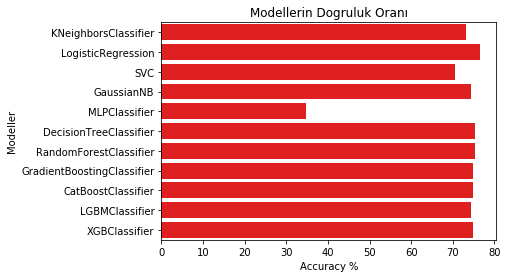

In [156]:
sonuc=[]
sonuclar=pd.DataFrame(columns=["Modeller","Accuracy"])

for model in modeller:
    isimler=model.__class__.__name__
    y_pred=model.predict(X_test)
    dogruluk=accuracy_score(y_test,y_pred)
    sonuc=pd.DataFrame([[isimler,dogruluk*100]],columns=["Modeller","Accuracy"])
    sonuclar=sonuclar.append(sonuc)
    
    
    sns.barplot(x="Accuracy",y="Modeller",data=sonuclar,color="r")
    plt.xlabel("Accuracy %")
    plt.title("Modellerin Dogruluk Oranı");